In [30]:
# a notebook for analysis of the simulated annealing results

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import numpy as np

(81, 81)
z(min, max) =     11.6656  1935.4875
44.0


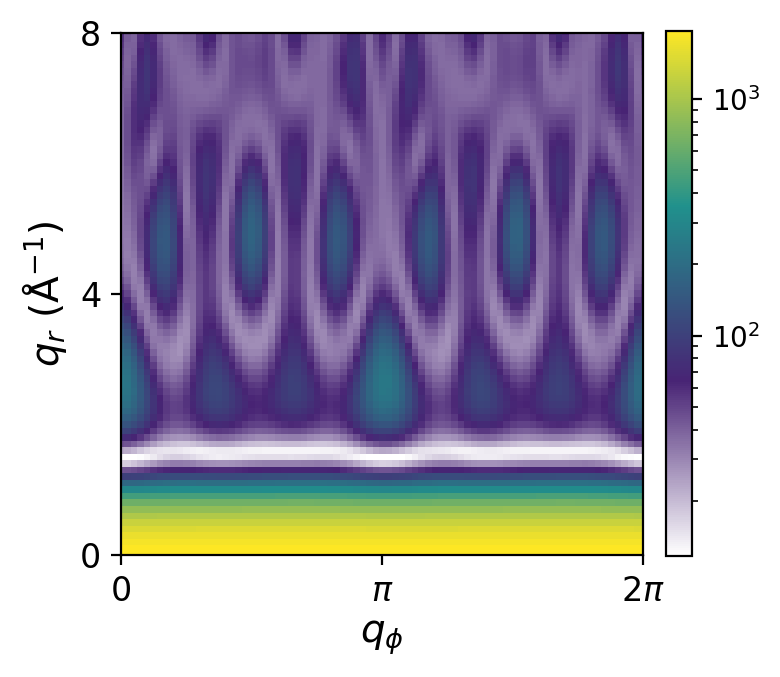

In [35]:
# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
#def function_z(x, y):
#    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
#    theta1 = np.arctan2(0.5 - x, 0.5 - y)
#    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
#    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
#    z = -(2 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(7. * theta1) +
#          (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(11. * theta2) +
#          0.7 * (x**2 + y**2))
#    return (np.max(z) - z) / (np.max(z) - np.min(z))

fname = "predicted_function"
# fname = "target_function"

target_function = np.load('results_test/%s.npy' % fname)
z = np.squeeze(target_function)
#.flatten()  # flattens array to 1D

# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
#n_angles = 11
#n_radii = 11
#min_radius = 0.
#radii = np.linspace(min_radius, 0.95, n_radii)

#angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
#angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
#angles[:, 1::2] += np.pi / n_angles

#x = (radii * np.cos(angles)).flatten()
#y = (radii * np.sin(angles)).flatten()
#z = function_z(x, y)
#print(x.shape)
#print(y.shape)
print(z.shape)
#print(z)
qmax = 8
xlen = z.shape[1]
ylen = z.shape[0]
x = np.linspace(0, 1, xlen)
y = np.linspace(0, qmax, ylen)

dpi = 200
figsize = (4, 4)

# Create figure and axis
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)  # High resolution

# Plot the array
# Perceptually Uniform Sequential Colormaps (Best for Scientific Data)

#     viridis (Default, great for perception)

#     plasma (Bright, high contrast)

#     inferno (Dark-to-bright, good for accessibility)

#     magma (Dark-to-light, warm tone)

#     cividis (Colorblind-friendly alternative to viridis)
# Cyclic Colormaps (For Circular Data Like Wind Directions)

#     twilight, twilight_shifted

#     hsv
# Sequential Colormaps (For Data That Increases in Intensity)

#     Greys (Grayscale)

#     Purples, Blues, Greens, Oranges, Reds

#     YlOrBr, YlOrRd, OrRd, PuRd, RdPu

#     BuPu, GnBu, PuBu, PuBuGn, BuGn, YlGn
# Diverging Colormaps (Best for Data with a Zero or Neutral Point)

#     coolwarm (Classic blue-red contrast)

#     bwr (Blue-White-Red, strong contrast)

#     seismic (More extreme version of bwr)

#     RdBu, RdGy, RdYlBu, RdYlGn, Spectral, PiYG, PRGn, BrBG


z_adjusted = z[0:z.shape[0],0:z.shape[1]]

z_adjusted[z_adjusted < 10] = 0  # Force some values to be exactly 0

# Set min and max range for color scaling
print( 'z(min, max) =  %10.4f %10.4f' % ( np.min(z_adjusted), np.max(z_adjusted) ) )
print(1936**.5)
vmin, vmax = np.min(z_adjusted), 1936  # Adjust these as needed

# Define a custom colormap transitioning from white to viridis
colors = [(1, 1, 1), plt.cm.viridis(0.1), plt.cm.viridis(0.5), plt.cm.viridis(1.1)]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Normalize: Ensures 0 is mapped to the white part of the colormap
# norm = mcolors.Normalize(vmin=0, vmax=np.max(z_adjusted))

# vmin=vmin, vmax=vmax, 
im = ax.imshow(z_adjusted, cmap=custom_cmap, norm=LogNorm(vmin=vmin, vmax=vmax), interpolation='none')

# Add a colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#cbar.set_label("Intensity", fontsize=14)

# Remove grid lines and ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xticklabels([])
# ax.set_yticklabels([])

# Custom tick positions and labels
custom_xticks = [0, 40, 80]  # Custom tick locations
custom_xticklabels = [r"$0$", r"$\pi$", r"$2\pi$"]

custom_yticks = [0, 40, 80]  # Custom tick locations
custom_yticklabels = ["0", "4", "8"]  # Custom tick labels


# Override default ticks
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels, fontsize=12)

ax.set_yticks(custom_yticks)
ax.set_yticklabels(custom_yticklabels, fontsize=12)

# Set axis labels
ax.set_ylabel(r"$q_r\ (\mathrm{\AA}^{-1}$)", fontsize=14)
ax.set_xlabel(r"$q_\phi$", fontsize=14)

# Set x and y limits to match the data boundaries
ax.set_xlim(0, xlen - 1)
ax.set_ylim(0, ylen - 1)

# Add a title
#ax.set_title("10x10 Data Visualization", fontsize=16, fontweight='bold')

# Remove borders
# for spine in ax.spines.values():
#     spine.set_visible(False)
# Remove extra white space
plt.tight_layout()

# Save as a high-quality PNG (optional)
plt.savefig("%s.png" % fname, dpi=dpi, bbox_inches='tight')

# Show the plot
plt.show()

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
#triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
#triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
#                         y[triang.triangles].mean(axis=1))
#                < min_radius)

# ----------------------------------------------------------------------------
# Refine data
# ----------------------------------------------------------------------------
#refiner = tri.UniformTriRefiner(triang)
#tri_refi, z_test_refi = refiner.refine_field(z, subdiv=0)
#print(z_test_refi.shape)

# ----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
# ----------------------------------------------------------------------------
#fig, ax = plt.subplots()
#ax.set_aspect('equal')
#ax.triplot(triang, lw=0.5, color='white')

#levels = np.arange(-400., 2500., 50)
# contour colourmap
#ax.tricontourf(tri_refi, z, levels=levels, cmap='terrain')
# adds contour lines
#ax.tricontour(tri_refi, z_test_refi, levels=levels,
#              colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
#              linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

# ax.set_title("High-resolution tricontouring")

#plt.show()